In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss0delay50bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

In [10]:
# Open the JSON file
with open('average_data/res1080fps30bit4.5gop(2,99,95)loss0delay50bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [11]:
# Open the JSON file
with open('average_data/res1080fps30bit3gop(2,99,95)loss0delay50bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [12]:
# Open the JSON file
with open('average_data/res1080fps30bit1.5gop(2,99,95)loss0delay50bw100 (avg).json', 'r') as file:
    json_data_data_3 = json.load(file)

# Convert JSON data to DataFrame
df_data_3 = pd.DataFrame(json_data_data_3)

In [13]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_1['_1_rawVideoTimestamp']
timestamps_2 = df_data_2['_1_rawVideoTimestamp']
timestamps_3 = df_data_3['_1_rawVideoTimestamp']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_1['_8_totalTime']
total_time_2 = df_data_2['_8_totalTime']
total_time_3 = df_data_3['_8_totalTime']

# Extract the first index values for the other metrics
metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

# Initialize dictionary to store metric values
metric_values = {metric: [] for metric in metrics}

# Extract values for each dataframe
for df in [df_data_0, df_data_1, df_data_2, df_data_3]:
    for metric in metrics:
        metric_values[metric].append(df[metric].iloc[0])

# Metrics Comparison
print("\n=== Metrics Comparison ===")
for metric in metrics:
    values = metric_values[metric]
    print("{}: {:.2f} vs {:.2f} vs {:.2f} vs {:.2f}".format(
        metric, values[0], values[1], values[2], values[3]
    ))


=== Metrics Comparison ===
avg_total_frames: 1800.00 vs 1783.67 vs 1800.00 vs 1800.00
avg_received_frames: 1800.00 vs 1783.67 vs 1800.00 vs 1800.00
avg_rendered_frames: 1800.00 vs 1783.67 vs 1800.00 vs 1800.00
avg_percentage_received_frames: 100.00 vs 100.00 vs 100.00 vs 100.00
avg_skipped_frames: 0.00 vs 0.00 vs 0.00 vs 0.00
avg_render_time_difference: 33.33 vs 33.65 vs 33.34 vs 33.34
avg_num_of_stall_events: 264.67 vs 268.33 vs 304.67 vs 384.33
avg_stall_duration: 978.33 vs 1659.00 vs 870.33 vs 1228.00
avg_i_frames: 29.67 vs 29.33 vs 29.00 vs 29.33
avg_gop_size_frames: 59.69 vs 59.82 vs 61.07 vs 60.38
avg_gop_size_time: 2.02 vs 2.05 vs 2.07 vs 2.05
avg_total_time: 113.64 vs 114.12 vs 111.63 vs 109.64
avg_25th_percentile_total_time: 109.67 vs 109.00 vs 108.00 vs 106.67
avg_50th_percentile_total_time: 113.33 vs 112.33 vs 111.00 vs 109.33
avg_75th_percentile_total_time: 116.67 vs 116.33 vs 114.67 vs 112.67
avg_std_dev_total_time: 5.40 vs 29.59 vs 5.02 vs 5.09
avg_encoding_time: 49.68 v

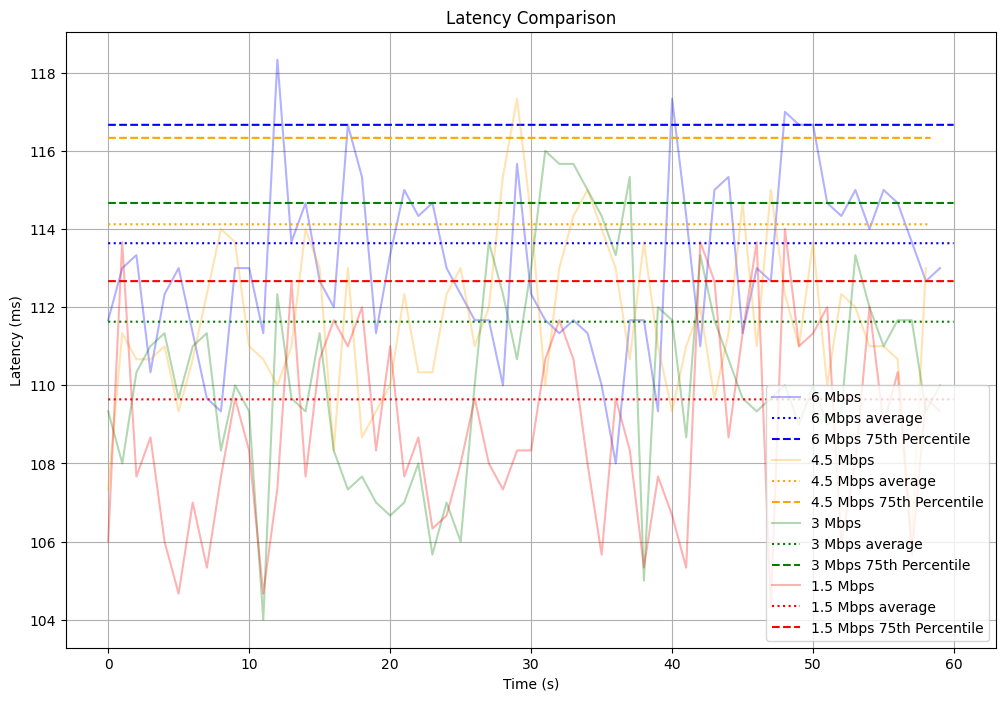

In [14]:
# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 30  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_3, smoothed_3 = sample_and_smooth(df_data_3, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='6 Mbps', color='blue', alpha=0.3)
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_total_time'].iloc[0]] * len(df_data_0), label='6 Mbps average', color='blue', linestyle='dotted')
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_0), label='6 Mbps 75th Percentile', color='blue', linestyle='dashed')

plt.plot(timestamps_1, smoothed_1, label='4.5 Mbps', color='orange', alpha=0.3)
plt.plot(df_data_1['_1_rawVideoTimestamp'], [df_data_1['avg_total_time'].iloc[0]] * len(df_data_1), label='4.5 Mbps average', color='orange', linestyle='dotted')
plt.plot(df_data_1['_1_rawVideoTimestamp'], [df_data_1['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_1), label='4.5 Mbps 75th Percentile', color='orange', linestyle='dashed')

plt.plot(timestamps_2, smoothed_2, label='3 Mbps', color='green', alpha=0.3)
plt.plot(df_data_2['_1_rawVideoTimestamp'], [df_data_2['avg_total_time'].iloc[0]] * len(df_data_2), label='3 Mbps average', color='green', linestyle='dotted')
plt.plot(df_data_2['_1_rawVideoTimestamp'], [df_data_2['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_2), label='3 Mbps 75th Percentile', color='green', linestyle='dashed')

plt.plot(timestamps_3, smoothed_3, label='1.5 Mbps', color='red', alpha=0.3)
plt.plot(df_data_3['_1_rawVideoTimestamp'], [df_data_3['avg_total_time'].iloc[0]] * len(df_data_3), label='1.5 Mbps average', color='red', linestyle='dotted')
plt.plot(df_data_3['_1_rawVideoTimestamp'], [df_data_3['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_3), label='1.5 Mbps 75th Percentile', color='red', linestyle='dashed')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
